## The notebook is compiled in connection to Chapter 10, Section 10.4 in the project "Landslide susceptibility mapping - A Machine Learning Approach" written at AAU by group Geo1 

This notebook describes the derivation of variables from the Digital Elevation Model (DEM) for external validation area

Imorting the neccessary libraries

In [1]:
from osgeo import gdal
import os
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import numpy as np
from numpy import ma
import richdem as rd

Setting the directory where the data is located

In [2]:
os.chdir(r'C:\Users\angelinkatula\Desktop\P8\external_validation\variables')

Plot the DEM (DTM). The DEM is resampled to 2m resolution from the original DEM and cropped to the land polygon as described in Notebook 1

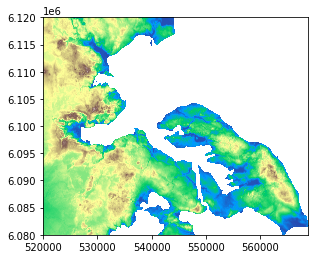

<AxesSubplot:>

In [3]:
DTM = rasterio.open("dem_elevation.tif")
show(DTM, cmap='terrain')

Checking "nodata" values

In [4]:
DTM.nodatavals

(-9999.0,)

Printing metadata

In [5]:
DTM.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 24378,
 'height': 20000,
 'count': 1,
 'crs': CRS.from_epsg(25832),
 'transform': Affine(2.0, 0.0, 520000.0,
        0.0, -2.0, 6120000.0)}

Inspecting the distribution of values to check for errors and anomalies in the data

In [6]:
fig, axhist = plt.subplots()
show_hist(DTM, bins=100, title="Elevation values distribution", stacked=False, alpha=0.5, label=None, ax=axhist)
axhist.set_xlabel('Elevation, meter')
axhist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

# Computing TPI (Topographic Position Index)

TPI stands for Topographic Position Index, which is defined as the difference between a central pixel and the mean of its surrounding cells (see Wilson et al 2007, Marine Geodesy 30:3-35) 


Opening DEM with GDAL

In [7]:
dem = gdal.Open("dem_elevation.tif")

Calculating Topographic Position Index with gdaldem. This command outputs a single-band raster with values computed from the elevation. Description of GDAL DEM utility can be seen on https://gdal.org/programs/gdaldem.html

In [8]:
TPI = gdal.DEMProcessing("TPI.tif", dem, 'TPI', computeEdges=True)

Closing the file to write changes to the disc

In [9]:
TPI = None

Plotting TPI data and value histogram

In [10]:
src = rasterio.open("TPI.tif")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Topographic Position Index", fontsize= 20)
cmap = plt.get_cmap('terrain')
data = src.read()

data_ma = np.ma.masked_where(data == -9999 ,
                        data,
                         copy=True)
show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=-0.05, vmax=0.05)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-0.05, vmax=0.05), cmap=cmap), ax=ax)
plt.savefig(r'TPI.png', bbox_inches='tight')

# TRI (Topographic Ruggedness Index)

This command outputs a single-band raster with values computed from the elevation. TRI stands for Terrain Ruggedness Index, which measures the difference between a central pixel and its surrounding cells. (see Riley, S.J., De Gloria, S.D., Elliot, R. (1999): A Terrain Ruggedness that Quantifies Topographic Heterogeneity. Intermountain Journal of Science, Vol.5, No.1-4, pp.23-27). TRI is computed as the square root of the sum of the square of the difference between a central pixel and its surrounding cells



In [12]:
TRI = gdal.DEMProcessing("TRI.tif", dem, 'TRI', computeEdges=True)

In [13]:
TRI = None

Plotting the map and the distribution

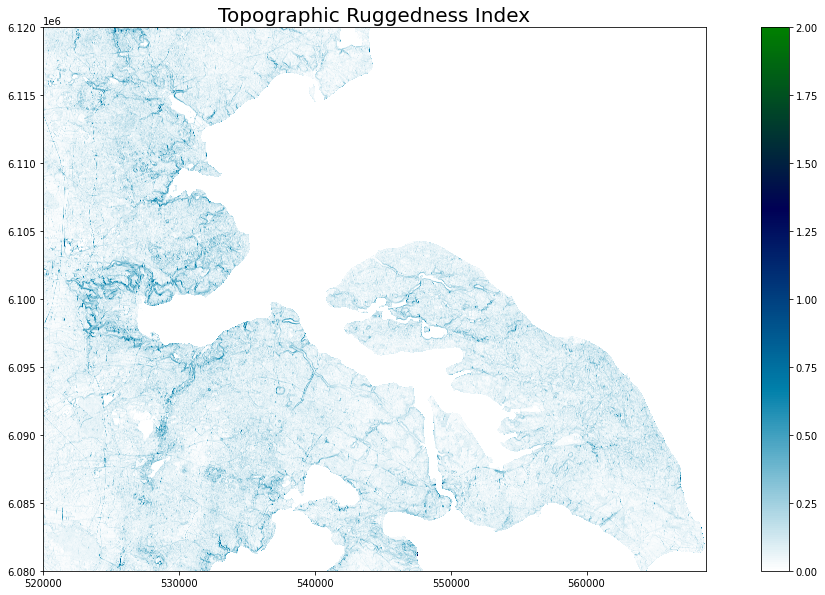

In [14]:
src = rasterio.open("TRI.tif")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Topographic Ruggedness Index", fontsize= 20)
cmap = plt.get_cmap('ocean_r')
data = src.read()

data_ma = np.ma.masked_where(data == -9999 ,
                        data,
                         copy=True)
show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=0, vmax=2)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=2), cmap=cmap), ax=ax)
plt.savefig(r'TRI.png', bbox_inches='tight')

# Roughness

Outputs a single-band raster with values computed from the elevation. Roughness is the measure of irregularity of the surface. It’s calculated by the largest inter-cell difference of a central pixel and its sourrounding cell

In [16]:
roughness = gdal.DEMProcessing("roughness.tif", dem, 'roughness', computeEdges=True)
roughness = None

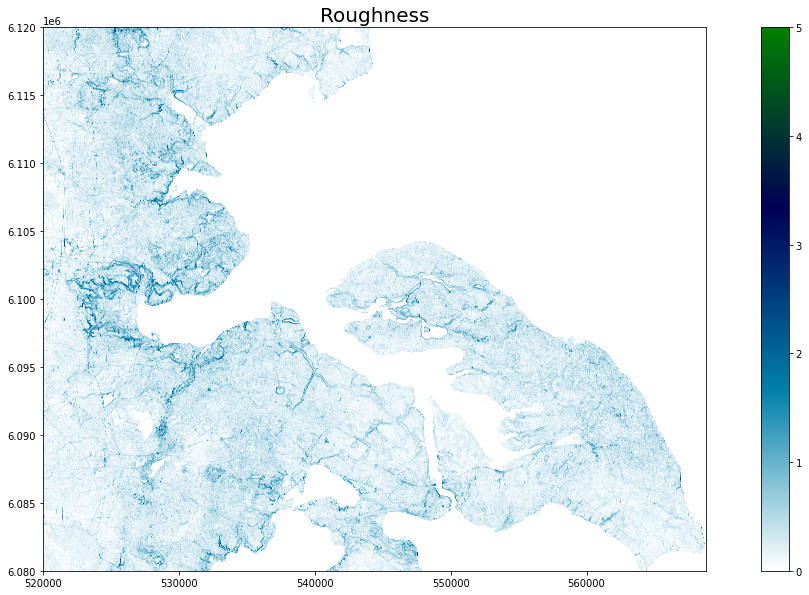

In [17]:
src = rasterio.open("roughness.tif")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Roughness", fontsize= 20)
cmap = plt.get_cmap('ocean_r')
data = src.read()

data_ma = np.ma.masked_where(data == -9999,
                          data,
                          copy=True)
show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=0, vmax=5)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=5), cmap=cmap), ax=ax)
plt.savefig(r'roughness.png', bbox_inches='tight')

# Aspect

Aspect function of GDAL outputs a 32-bit float raster with values between 0° and 360° representing the azimuth that slopes face. 0° means that the slope is facing the North, 90° it’s facing the East, 180° it’s facing the South and 270° it’s facing the West ). The aspect value -9999 is used as the nodata value to indicate undefined aspect in flat areas with slope=0 

In [19]:
aspect = gdal.DEMProcessing("aspect_degrees.tif", dem, 'aspect', computeEdges=True)
aspect = None

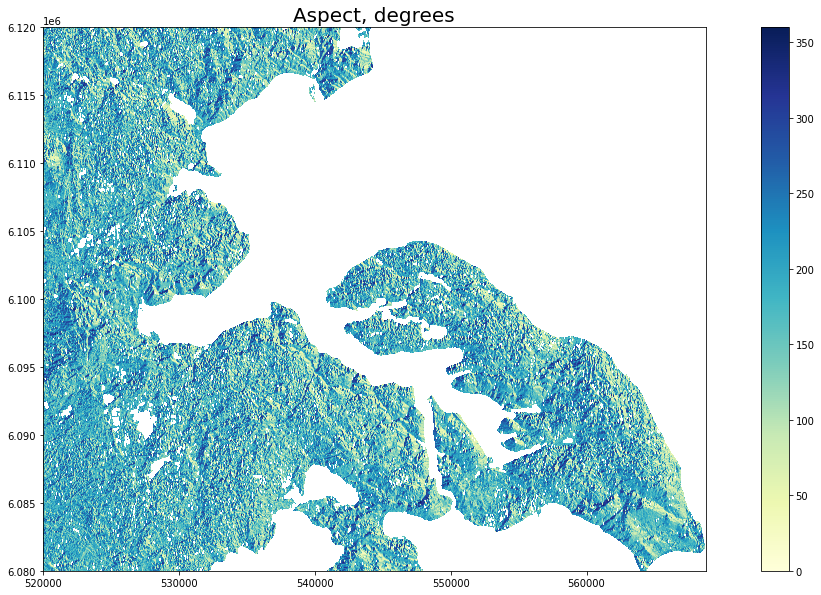

In [20]:
src = rasterio.open("aspect_degrees.tif")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Aspect, degrees", fontsize= 20)
cmap = plt.get_cmap('YlGnBu')
data = src.read()

data_ma = np.ma.masked_where(data == -9999 ,
                        data,
                         copy=True)
show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=np.nanmin(data_ma), vmax=np.nanmax(data_ma))
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data_ma), vmax=np.nanmax(data_ma)), cmap=cmap), ax=ax)
plt.savefig(r'aspect.png', bbox_inches='tight')

Masking novalues=-9999 and converting degrees to radians

In [21]:
aspect=src.read(1)
aspect_masked = np.ma.masked_array(aspect, mask=(aspect < 0))
np.min(aspect_masked)

0.0

In [22]:
aspect_rad = np.radians(aspect_masked)

Aspect is a circular land surface parameter. The difference between 1 and 360 is only one unit. That's why it makes sense to decompose aspect into its sine and cosine components representing the exposedness of the slopes to east and north with values varying between -1 and 1, so that Machine Learning would not assign more importance to 360 than to 1

In [23]:
aspect_northerness = np.cos(aspect_rad)

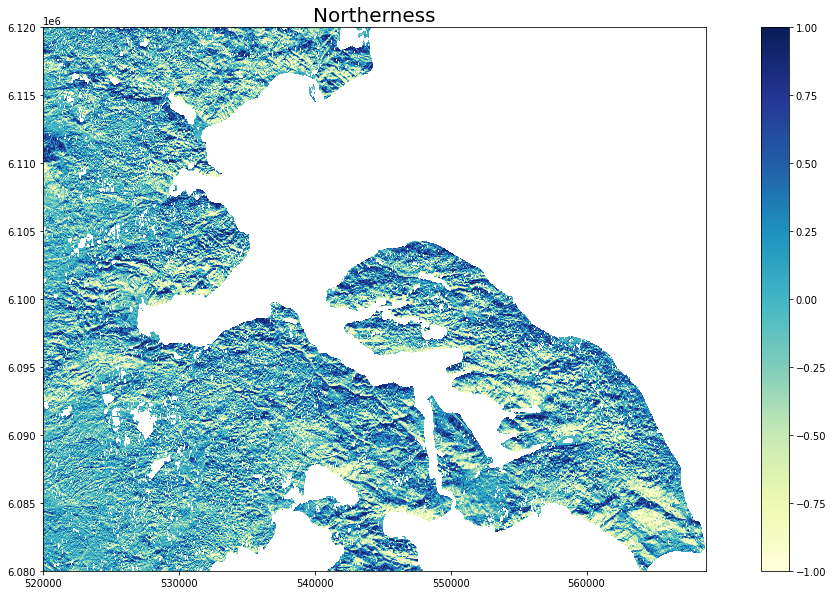

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Northerness", fontsize= 20)
cmap = plt.get_cmap('YlGnBu')
data = aspect_northerness

data_ma = np.ma.masked_where(data == -9999 ,
                        data,
                         copy=True)
show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=np.nanmin(data_ma), vmax=np.nanmax(data_ma))
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data_ma), vmax=np.nanmax(data_ma)), cmap=cmap), ax=ax)
plt.savefig(r'easterness.png', bbox_inches='tight')

Saving the output as .tif file

In [25]:
aspect = gdal.Open("aspect_degrees.tif")
drv = gdal.GetDriverByName('GTiff')     # create driver for writing geotiff file
outRaster = drv.CreateCopy('northerness.tif', aspect, 0 )   # create new copy of inut raster on disk
northerness = outRaster.GetRasterBand(1)                               # get the first (and only) band of the new copy
northerness.WriteArray(aspect_northerness)                                           # write array data to this band 
outRaster = None  

In [26]:
aspect_eastness = np.sin(aspect_rad)

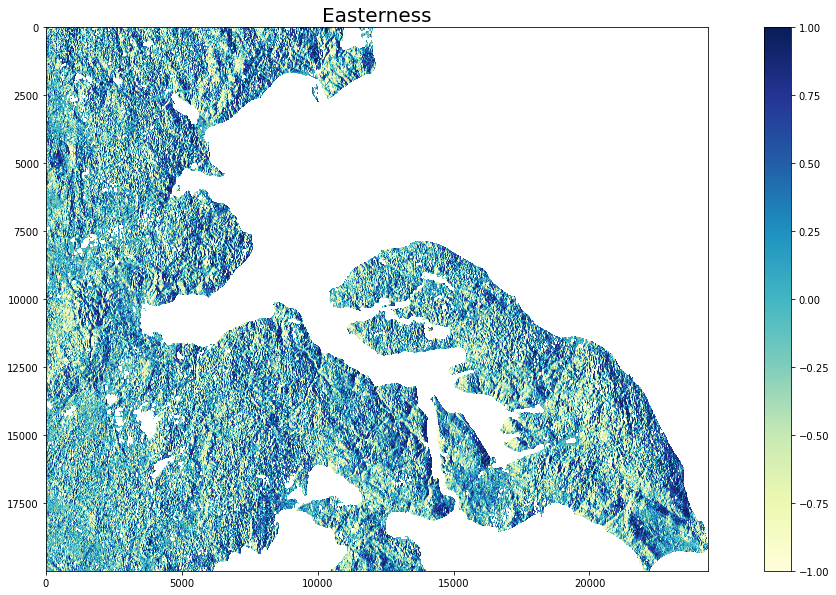

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Easterness", fontsize= 20)
cmap = plt.get_cmap('YlGnBu')
data = aspect_eastness

data_ma = np.ma.masked_where(data == -9999 ,
                        data,
                         copy=True)
show(data_ma, ax=ax, cmap=cmap, vmin=np.nanmin(data_ma), vmax=np.nanmax(data_ma))
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data_ma), vmax=np.nanmax(data_ma)), cmap=cmap), ax=ax)
plt.savefig(r'easterness.png', bbox_inches='tight')

Saving the file

In [28]:
aspect = gdal.Open("aspect_degrees.tif")
drv = gdal.GetDriverByName('GTiff')     # create driver for writing geotiff file
outRaster = drv.CreateCopy('eastness.tif', aspect, 0 )   # create new copy of inut raster on disk
northerness = outRaster.GetRasterBand(1)                               # get the first (and only) band of the new copy
northerness.WriteArray(aspect_eastness)                                           # write array data to this band 
outRaster = None  
aspect= None

# Plan and profile curvature

In [29]:
import richdem as rd

RichDEM is a set of digital elevation model (DEM) hydrologic analysis tools. RichDEM uses parallel processing and state of the art algorithms to quickly process even very large DEMs (Barnes, Richard. 2016). RichDEM: Terrain Analysis Software. http://github.com/r-barnes/richdem and https://richdem.readthedocs.io/en/latest/intro.html

In [30]:
dem = rd.LoadGDAL("dem_elevation.tif", no_data=-9999)

In [31]:
profile_curvature = rd.TerrainAttribute(dem, attrib='profile_curvature')
rd.SaveGDAL("profile_curvature.tif", profile_curvature)

Profile curvature: 
Zevenbergen, L.W., Thorne, C.R., 1987. Quantitative analysis of land surface topography. Earth surface processes and landforms 12, 47–56.
Profile curvature is calculated by fitting a surface to the focal cell and its neighbours. The profile curvature runs parallel to the maximum slope of this surface and affects the acceleration and deceleration of flow down the slope.  (Barnes, Richard. 2016)

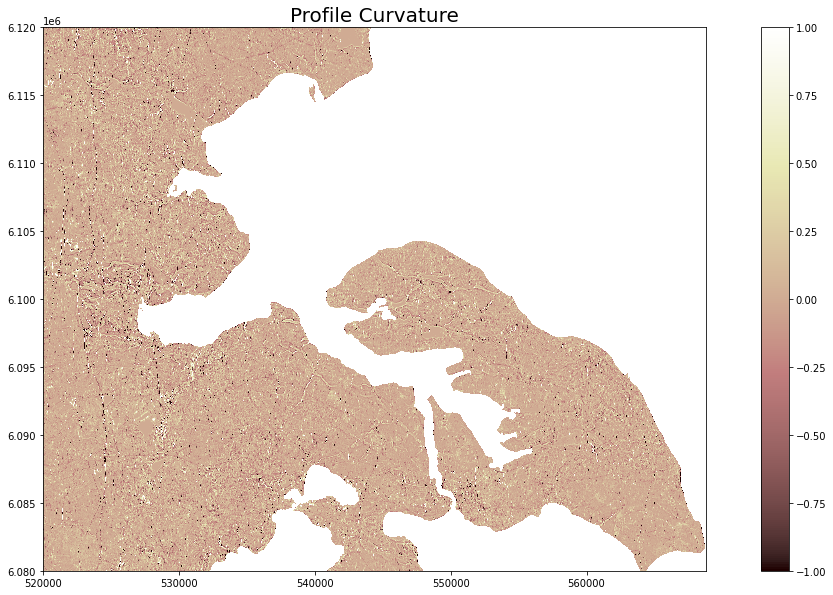

In [32]:
src = rasterio.open("profile_curvature.tif")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Profile Curvature", fontsize= 20)
cmap = plt.get_cmap('pink')
data = src.read()

data_ma = np.ma.masked_where(data == -9999 ,
                         data,
                          copy=True)
show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=-1, vmax=1)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-1, vmax=1), cmap=cmap), ax=ax)
plt.savefig(r'profile_curvature.png', bbox_inches='tight')

In [34]:
planform_curvature = rd.TerrainAttribute(dem, attrib='planform_curvature')
rd.SaveGDAL("planform_curvature.tif", planform_curvature)

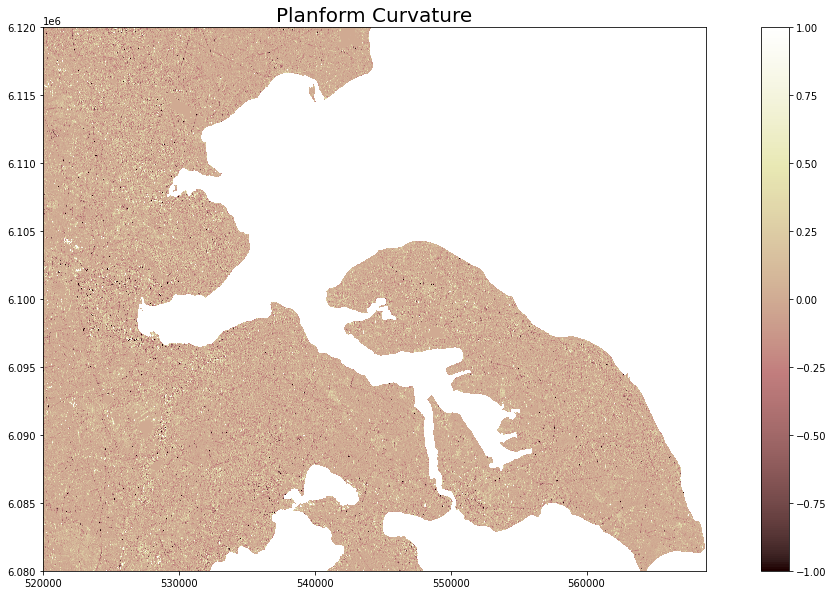

In [35]:
src = rasterio.open("planform_curvature.tif")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Planform Curvature", fontsize= 20)
cmap = plt.get_cmap('pink')
data = src.read()

data_ma = np.ma.masked_where(data == -9999 ,
                         data,
                         copy=True)
show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=-1, vmax=1)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-1, vmax=1), cmap=cmap), ax=ax)
plt.savefig(r'planform_curvature.png', bbox_inches='tight')

# Slope

This command outputst a 32-bit float raster with slope values in degrees. 

In [37]:
dem = gdal.Open('dem_elevation.tif')
slope = gdal.DEMProcessing("slope.tif", dem, 'slope', computeEdges=True)

In [38]:
slopeArray = slope.ReadAsArray()

Masking nodata values

In [39]:
slope_masked = np.ma.masked_array(slopeArray, mask=(slopeArray < 0))
np.min(slope_masked)

0.0

Slope in radians

In [40]:
slope_rad = np.radians(slope_masked)

In [41]:
np.min(slope_rad)

0.0

Saving the file as .tif

In [42]:
drv = gdal.GetDriverByName('GTiff')     # create driver for writing geotiff file
outRaster = drv.CreateCopy('slope_rad.tif', dem, 0 )   # create new copy of input raster on disk
slope_radian = outRaster.GetRasterBand(1)                               # get the first (and only) band of the new copy
slope_radian.WriteArray(slope_rad)                                           # write array data to this band 
outRaster = None

In [43]:
dem = None
slope = None

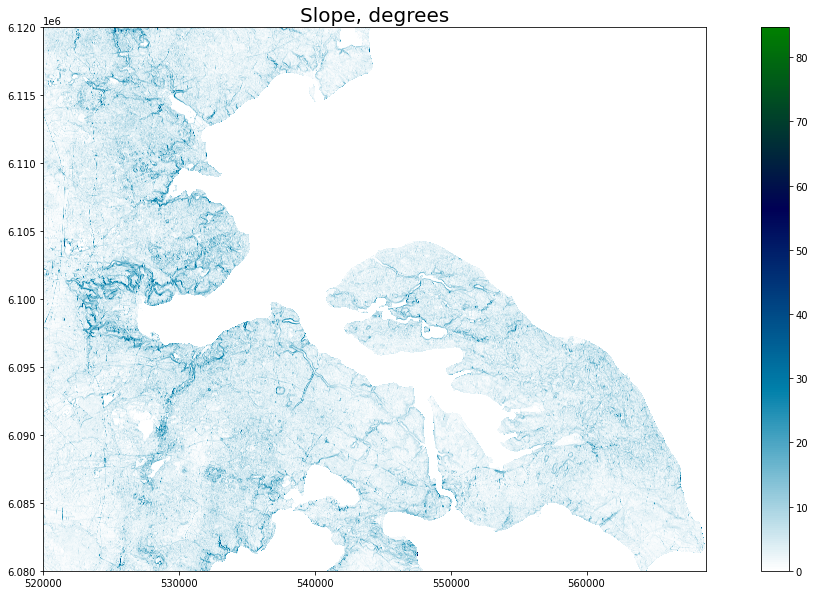

In [44]:
src = rasterio.open("slope.tif")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Slope, degrees", fontsize= 20)
cmap = plt.get_cmap('ocean_r')
data = src.read()

data_ma = np.ma.masked_where(data == -9999 ,
                        data,
                         copy=True)
show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=0, vmax=60)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=np.nanmax(data)), cmap=cmap), ax=ax)
plt.savefig(r'slope_degrees.png', bbox_inches='tight')

# Topographic Wetness Index (TWI)

The Topographic Wetness Index (TWI) is a useful model to estimate where water will accumulate in an area with elevation differences. It is a function of slope and the upstream contributing area

In [46]:
dem = rd.LoadGDAL("dem_elevation.tif", no_data=-9999)

Filling the sinks

In [47]:
dem_filled = rd.FillDepressions(dem, epsilon=True, in_place=False)

Calculating Flow accumulation

c:\Miniconda\envs\test1\lib\site-packages\richdem\__init__.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


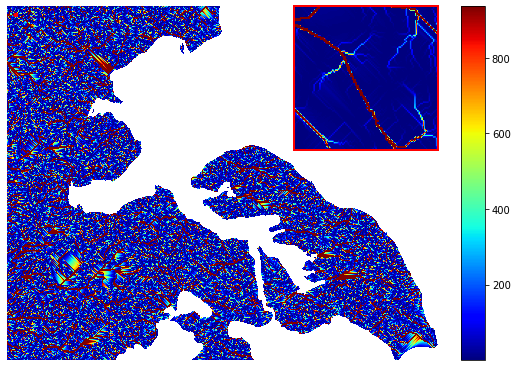

{'vmin': 1.0, 'vmax': 936.0}

In [48]:
accum_d8 = rd.FlowAccumulation(dem_filled, method='D8')
out = rd.SaveGDAL("flow_acc.tif", accum_d8)
rd.rdShow(accum_d8, zxmin=450, zxmax=550, zymin=550, zymax=450, figsize=(8,5.5), axes=False, cmap='jet')

In [49]:
flow_acc = gdal.Open("flow_acc.tif")

In [50]:
slope_rad = gdal.Open("slope_rad.tif")

In [51]:
slope_radArray = slope_rad.GetRasterBand(1).ReadAsArray()
slope_masked = np.ma.masked_array(slope_radArray, mask=(slope_radArray < 0))
np.min(slope_masked)

0.0

In [52]:
flow_accArray = flow_acc.GetRasterBand(1).ReadAsArray()

In [53]:
np.min(flow_accArray)

-1.0

Masking negative values to compute TWI

In [54]:
flow_acc_masked = np.ma.masked_array(flow_accArray, mask=(flow_accArray < 0))
np.min(flow_acc_masked)

1.0

Plotting flow accumulation

<function matplotlib.pyplot.show(close=None, block=None)>

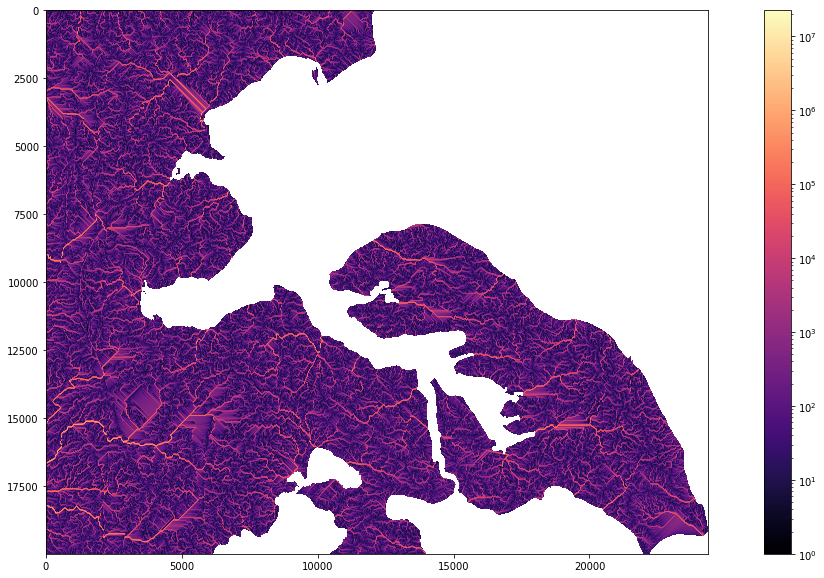

In [55]:
from matplotlib.colors import LogNorm
f= plt.figure(figsize=(20, 10))
plt.imshow(flow_acc_masked, 'magma', norm=LogNorm())
plt.colorbar()
plt.show

In [56]:
from numpy import ma

The formula for TWI is log(catchment area/tan(slope)), 0.001 is added so that we do not divide by 0, while 2*2 is the pixel area

In [57]:
TWI = ma.log(flow_acc_masked*2*2/(np.tan(slope_radArray)+0.001))

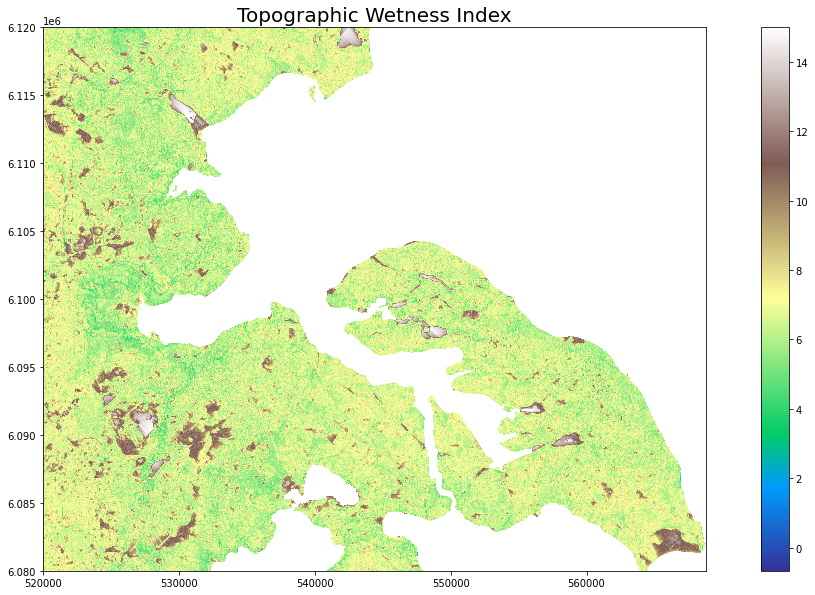

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Topographic Wetness Index", fontsize= 20)
cmap = plt.get_cmap('terrain')
data = TWI

data_ma = np.ma.masked_where(data == -9999 ,
                        data,
                         copy=True)
show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=-0.67, vmax=15)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-0.67, vmax=15), cmap=cmap), ax=ax)
plt.savefig(r'TWI.png', bbox_inches='tight')

# Stream power Index

The Stream Power Index (SPI) is a measure of the erosive power of flowing water. SPI is calculated based upon slope and contributing area

In [63]:
SPI=ma.log(flow_acc_masked*2*2*np.tan(slope_radArray))

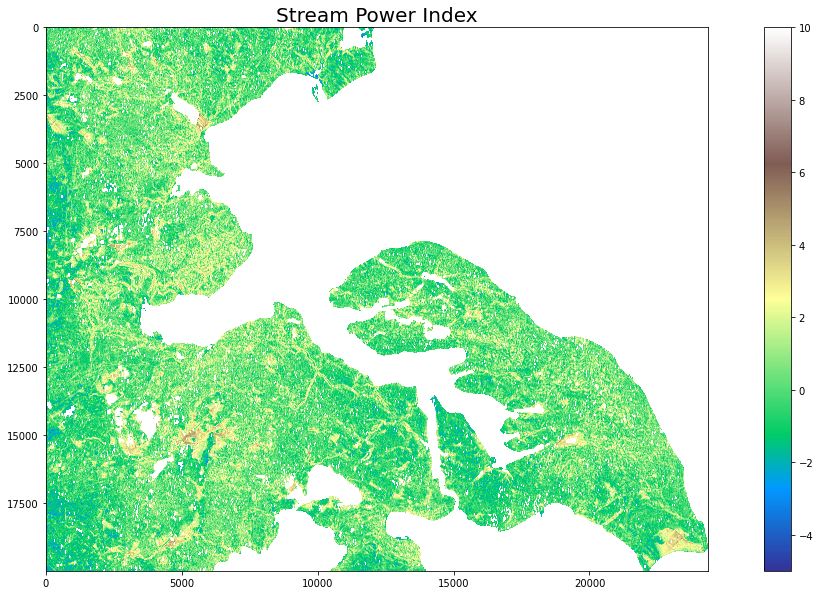

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Stream Power Index", fontsize= 20)
cmap = plt.get_cmap('terrain')
data = SPI

data_ma = np.ma.masked_where(data == -9999 ,
                        data,
                         copy=True)
show(data_ma, ax=ax, cmap=cmap, vmin=-5, vmax=10)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-5, vmax=10), cmap=cmap), ax=ax)
plt.savefig(r'SPI.png', bbox_inches='tight')

In [65]:
np.min(SPI)

-13.580909

In [66]:
np.max(SPI)

17.825035